In [45]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

In [47]:
def plotData(data):
    negat = data[:,2] == 0
    poz = data[:,2] == 1
    axes = plt.gca()
    axes.scatter(data[poz][:,0], data[poz][:,1], marker='x', c='k', s=30)
    axes.scatter(data[negat][:,0], data[negat][:,1], marker='o',c='b', s=30)

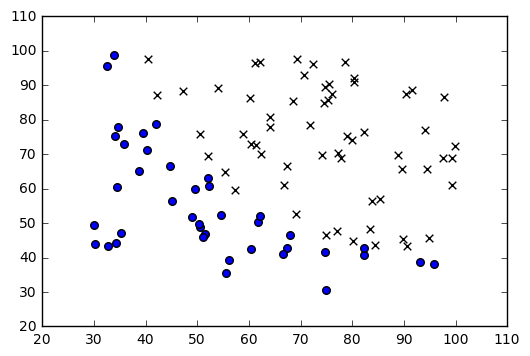

In [48]:
plotData(data)

In [49]:
def sigmoida(z):
    return(1 / (1 + np.exp(-z)))

In [50]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoida(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [51]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoida(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [52]:
def gradient_descent(X, y, lr, steps=100):
    theta = np.random.uniform(0.1, 1.0, size=X.shape[-1])
    cost_log = []
    for i in range(steps):
        theta = theta - lr * gradient(theta, X, y)
        cost_log.append(costFunction(theta, X, y))
    return cost_log

In [53]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost:', cost)
print('Grad:', grad)

Cost: 0.69314718056
Grad: [ -0.1        -12.00921659 -11.26284221]


In [55]:
min(gradient_descent(X, y, 0.0001, 900000))


0.41140837923849377